In [1]:
# UPDATE TO MATCH PERSONAL DIRECTORY STRUCTURE
DIR = 'C:\\Users\\jesse\\Documents\\GitHub\\vanity_sizing_project\\data\\'

In [2]:
import pandas as pd
import pickle

# Prepping Data

In [3]:
with open(DIR+'rtr_reviews_uncleaned.pkl', 'rb') as f:
    data = pickle.load(f)

customers = data[['user_id', 'weight', 'body type', 'height', 'size', 'age','band_size', 'cup_size']]

customers = customers.drop_duplicates(subset='user_id')

customers_complete = customers.dropna()

In [4]:
customers_complete

,user_id,weight,body type,height,size,age,band_size,cup_size
0,420272,137.0,hourglass,68,14,28,34,d
1,273551,132.0,straight & narrow,66,12,36,34,b
3,909926,135.0,pear,65,8,34,34,c
4,151944,145.0,athletic,69,12,27,34,b
5,734848,138.0,athletic,68,8,45,32,b
...,...,...,...,...,...,...,...,...
192339,597756,220.0,full bust,64,35,32,38,dd
192343,838239,150.0,hourglass,60,24,55,36,c
192347,442241,127.0,full bust,65,8,33,34,d
192353,961120,165.0,pear,66,16,31,36,c


Body types are non-ordinal categorical. Handle with dummies.

In [5]:
dummies = pd.get_dummies(customers_complete['body type'])
customers_complete = customers_complete.drop(columns=['body type'])
customers_complete = pd.concat([customers_complete, dummies], axis=1)

In [6]:
#to avoid multicollinearity, we drop one of the dummy variables
customers_complete = customers_complete.drop(columns=['athletic'])

Size is an ordinal categorical. Ensure stored as an ordered categorical type.

In [7]:
customers_complete['size'].value_counts()

size
8     16002
4     12331
12    10156
16     7135
20     6420
1      6291
14     3668
24     3345
9      1502
13     1368
28     1310
17     1030
5       967
21      835
25      569
2       440
3       410
32      403
39      400
7       368
35      357
0       310
45      290
26      276
11      229
29      214
51      164
15      158
36       89
57       60
19       49
40       36
46       33
23       33
42       23
27       22
48       14
33       12
43       10
49        8
58        8
52        7
34        4
54        4
18        4
38        3
56        3
22        3
44        2
10        2
30        2
6         1
37        1
55        1
41        0
50        0
Name: count, dtype: int64

In [8]:
# Define the order of the categories by ordering size from smallest to largest in the size column
customers_complete = customers_complete.sort_values('size')
categories = customers_complete['size'].unique()

# Convert the column to an ordered categorical type
customers_complete['size'] = pd.Categorical(customers_complete['size'], categories=categories, ordered=True)

# Convert the column to an ordered categorical type
customers_complete['size'] = pd.Categorical(customers_complete['size'], categories=categories, ordered=True)

Band size is also an ordinal categorical variable. Handle the same way.

In [9]:
customers_complete['band_size'].value_counts()

band_size
34    36315
32    19202
36    16894
38     4139
30      370
40      197
28      138
42       89
44       33
48        3
46        2
Name: count, dtype: int64

In [10]:
# Define the order of the categories by ordering size from smallest to largest in the size column
customers_complete = customers_complete.sort_values('band_size')
categories = customers_complete['band_size'].unique()

# Convert the column to an ordered categorical type
customers_complete['band_size'] = pd.Categorical(customers_complete['band_size'], categories=categories, ordered=True)

# Convert the column to an ordered categorical type
customers_complete['band_size'] = pd.Categorical(customers_complete['band_size'], categories=categories, ordered=True)

Cup size is ordinal category, little bit more complicated.

In [11]:
customers_complete['cup_size'].value_counts()

cup_size
b      22555
c      21948
d      19340
a       7120
dd      2548
d+      2111
ddd      933
aa       381
g        187
f        172
h         63
i         13
j         11
Name: count, dtype: int64

In [12]:
categories = ['aa', 'a', 'b', 'c', 'd', 'dd', 'd+', 'ddd', 'f', 'g', 'h', 'i', 'j']

customers_complete['cup_size'] = pd.Categorical(customers_complete['cup_size'], categories=categories, ordered=True)

# Convert the column to an ordered categorical type
customers_complete['cup_size'] = pd.Categorical(customers_complete['cup_size'], categories=categories, ordered=True)

In [13]:
customers_complete

,user_id,weight,height,size,age,band_size,cup_size,apple,full bust,hourglass,pear,petite,straight & narrow
88101,145298,110.0,61,8,29,28,c,False,False,False,False,True,False
28842,131686,120.0,60,4,33,28,c,False,False,True,False,False,False
71720,216058,155.0,67,16,49,28,c,False,False,True,False,False,False
79254,582476,134.0,66,8,34,28,b,False,False,False,True,False,False
103724,387207,130.0,63,4,21,28,b,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154930,809758,250.0,66,54,47,46,ddd,True,False,False,False,False,False
39798,340310,235.0,65,57,30,46,ddd,True,False,False,False,False,False
47770,445277,225.0,60,51,38,48,d,True,False,False,False,False,False
34583,220121,220.0,67,51,47,48,dd,False,False,False,False,False,False


In [14]:
customers_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77382 entries, 88101 to 112119
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   user_id            77382 non-null  int64   
 1   weight             77382 non-null  float64 
 2   height             77382 non-null  Int64   
 3   size               77382 non-null  category
 4   age                77382 non-null  Int64   
 5   band_size          77382 non-null  category
 6   cup_size           77382 non-null  category
 7   apple              77382 non-null  bool    
 8   full bust          77382 non-null  bool    
 9   hourglass          77382 non-null  bool    
 10  pear               77382 non-null  bool    
 11  petite             77382 non-null  bool    
 12  straight & narrow  77382 non-null  bool    
dtypes: Int64(2), bool(6), category(3), float64(1), int64(1)
memory usage: 3.8 MB


In [15]:
customers_complete['size'] = customers_complete['size'].cat.codes
customers_complete['band_size'] = customers_complete['band_size'].cat.codes
customers_complete['cup_size'] = customers_complete['cup_size'].cat.codes

In [16]:
customers_complete

,user_id,weight,height,size,age,band_size,cup_size,apple,full bust,hourglass,pear,petite,straight & narrow
88101,145298,110.0,61,8,29,0,3,False,False,False,False,True,False
28842,131686,120.0,60,4,33,0,3,False,False,True,False,False,False
71720,216058,155.0,67,16,49,0,3,False,False,True,False,False,False
79254,582476,134.0,66,8,34,0,2,False,False,False,True,False,False
103724,387207,130.0,63,4,21,0,2,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154930,809758,250.0,66,51,47,9,7,True,False,False,False,False,False
39798,340310,235.0,65,54,30,9,7,True,False,False,False,False,False
47770,445277,225.0,60,49,38,10,4,True,False,False,False,False,False
34583,220121,220.0,67,49,47,10,5,False,False,False,False,False,False


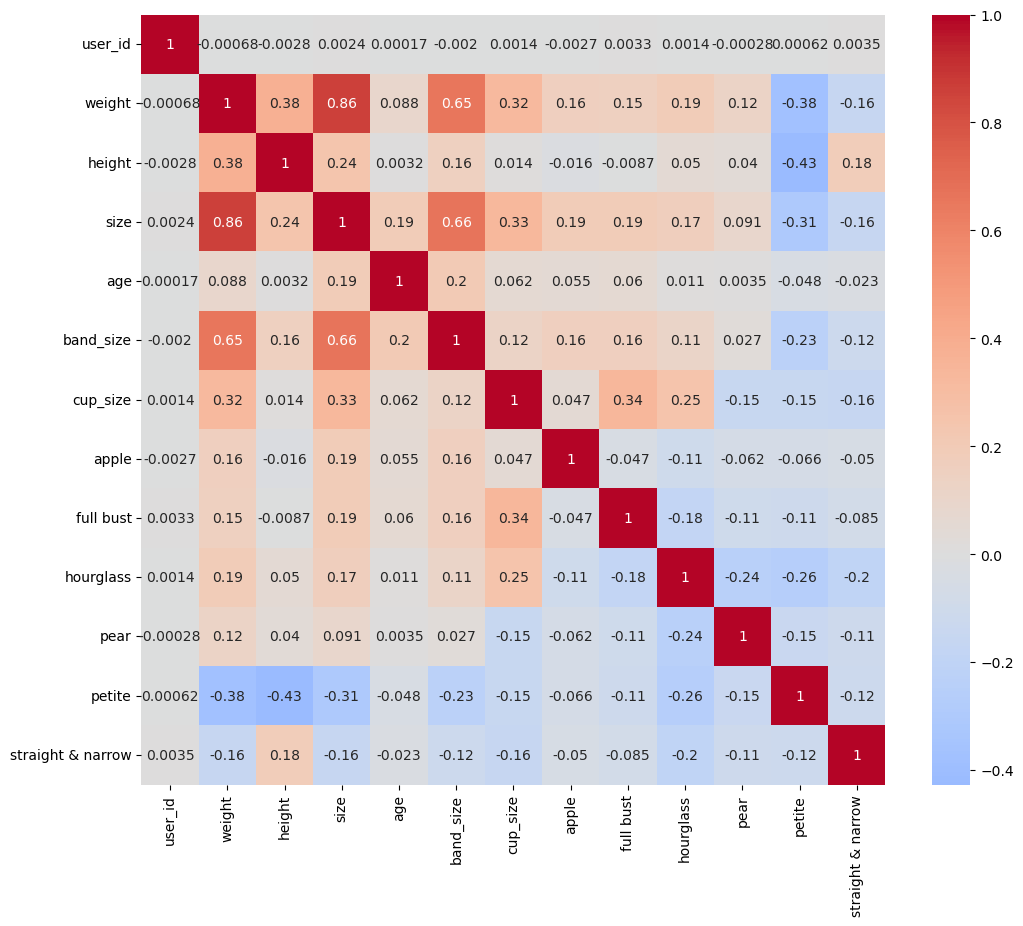

In [17]:
#plot multicolinearity on a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(customers_complete.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()


In [18]:
#drop size column
customers_complete = customers_complete.drop(columns=['size'])

# Clustering Models

### DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import jaccard

# Sample a fraction of your data
sample = customers_complete.sample(frac=0.1, random_state=42)

# Compute the pairwise Jaccard distances
distances = pairwise_distances(sample, metric=jaccard)

# Run DBSCAN with the precomputed distance matrix
db = DBSCAN(metric='precomputed')
clusters = db.fit_predict(distances)